In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import requests
import json
from path import Path

In [22]:
#Importing the dataset
data = Path('../Data/NBA_Salary4.csv')
df = pd.read_csv(data)
print(df)

             Team   Salary cap      Season Playoffs  Wins    PCT
0    Golden State     178980766  2021/2022      Yes    53  0.646
1        Brooklyn     174811922  2021/2022      Yes    44  0.537
2     LA Clippers     168378382  2021/2022       No    42  0.512
3       LA Lakers     164409293  2021/2022       No    33  0.402
4       Milwaukee     162135421  2021/2022      Yes    51  0.622
..            ...           ...        ...      ...   ...    ...
145      Brooklyn      95475397  2017/2018       No    28  0.341
146       Indiana      95271736  2017/2018      Yes    48  0.585
147       Phoenix      92684083  2017/2018       No    21  0.256
148       Chicago      90466801  2017/2018       No    27  0.329
149        Dallas      85440245  2017/2018       No    24  0.293

[150 rows x 6 columns]


In [23]:
NBA_df = df.drop(['Team','Season','Playoffs','Wins'], axis=1)
print(NBA_df)

      Salary cap     PCT
0       178980766  0.646
1       174811922  0.537
2       168378382  0.512
3       164409293  0.402
4       162135421  0.622
..            ...    ...
145      95475397  0.341
146      95271736  0.585
147      92684083  0.256
148      90466801  0.329
149      85440245  0.293

[150 rows x 2 columns]


In [24]:
X = NBA_df.iloc[:, :-1].values
y = NBA_df.iloc[:, 1].values
df

,Team,Salary cap,Season,Playoffs,Wins,PCT
0,Golden State,178980766,2021/2022,Yes,53,0.646
1,Brooklyn,174811922,2021/2022,Yes,44,0.537
2,LA Clippers,168378382,2021/2022,No,42,0.512
3,LA Lakers,164409293,2021/2022,No,33,0.402
4,Milwaukee,162135421,2021/2022,Yes,51,0.622
...,...,...,...,...,...,...
145,Brooklyn,95475397,2017/2018,No,28,0.341
146,Indiana,95271736,2017/2018,Yes,48,0.585
147,Phoenix,92684083,2017/2018,No,21,0.256
148,Chicago,90466801,2017/2018,No,27,0.329


In [25]:
print(X)

[[178980766]
 [174811922]
 [168378382]
 [164409293]
 [162135421]
 [149364516]
 [148922969]
 [140840240]
 [138598410]
 [138181486]
 [138096726]
 [137098327]
 [136476474]
 [136385911]
 [136166020]
 [136083814]
 [135793968]
 [134671484]
 [132267085]
 [131120355]
 [130457848]
 [128019790]
 [127655401]
 [126786646]
 [124788473]
 [124600538]
 [122624081]
 [122139566]
 [117284457]
 [ 82022873]
 [171105334]
 [170444633]
 [147825311]
 [139722606]
 [139334713]
 [136881324]
 [136623929]
 [134731235]
 [133901495]
 [132931565]
 [132022601]
 [131904647]
 [131784255]
 [131294012]
 [130334934]
 [130237102]
 [129793210]
 [129605319]
 [129537825]
 [129131910]
 [128963580]
 [128858241]
 [127657823]
 [121739163]
 [118804016]
 [117041599]
 [108218809]
 [106847430]
 [102137151]
 [ 95774839]
 [132017938]
 [131979953]
 [131506341]
 [131059022]
 [129912339]
 [129867871]
 [129254928]
 [128746180]
 [128109922]
 [126095610]
 [123971686]
 [122612183]
 [122463495]
 [121296256]
 [120871082]
 [119217331]
 [118910311]

In [26]:
print(y)

[0.646 0.537 0.512 0.402 0.622 0.598 0.622 0.646 0.585 0.305 0.622 0.561
 0.78  0.537 0.524 0.561 0.439 0.585 0.244 0.28  0.366 0.427 0.415 0.293
 0.329 0.634 0.451 0.524 0.683 0.293 0.542 0.667 0.681 0.653 0.583 0.722
 0.639 0.556 0.431 0.5   0.528 0.583 0.236 0.472 0.319 0.472 0.653 0.306
 0.458 0.375 0.431 0.708 0.583 0.292 0.569 0.278 0.458 0.431 0.569 0.306
 0.611 0.473 0.681 0.292 0.589 0.603 0.231 0.63  0.611 0.452 0.732 0.767
 0.736 0.347 0.573 0.451 0.611 0.486 0.417 0.667 0.297 0.431 0.616 0.338
 0.299 0.303 0.318 0.466 0.466 0.354 0.476 0.695 0.598 0.707 0.732 0.646
 0.5   0.646 0.598 0.402 0.39  0.207 0.232 0.439 0.585 0.476 0.512 0.659
 0.585 0.402 0.622 0.512 0.61  0.268 0.585 0.232 0.451 0.476 0.402 0.354
 0.61  0.707 0.585 0.537 0.524 0.585 0.537 0.793 0.476 0.512 0.598 0.439
 0.72  0.573 0.671 0.573 0.268 0.561 0.585 0.354 0.427 0.634 0.293 0.329
 0.305 0.341 0.585 0.256 0.329 0.293]


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [28]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [30]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [31]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[1]]))

[0.09010762]


ValueError: x and y must have same first dimension, but have shapes (150, 1) and (50,)

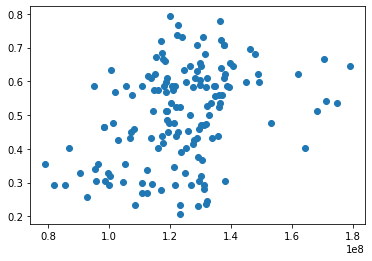

In [32]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()